---
<img src="https://ead.ufes.br/pluginfile.php/188418/course/summary/Banner%20IA%20e%20CD.png" style="float: right;">


#  Generalização: Overfitting, underfitting, viés e variância


**Resumo**

**Underfitting** e **Overfitting** são dois problemas comuns que podem ocorrer durante o treinamento de modelos de aprendizado de máquina. Eles afetam a capacidade do modelo de generalizar bem para novos dados.

Já o  **Viés** e **Variância** são conceitos que ajudam a entender a capacidade de um modelo de generalizar para novos dados.



##  Underfitting

Underfitting ocorre quando um modelo é muito simples para capturar os padrões subjacentes nos dados de treinamento. Isso geralmente resulta em desempenho ruim tanto no conjunto de treinamento quanto no conjunto de teste. Um modelo que sofre de underfitting não consegue aprender a relação entre as variáveis de entrada e saída. As principais causas de underfitting são:

1. Modelo muito simples: O modelo não tem a complexidade necessária para capturar a estrutura dos dados.
2. Poucos parâmetros: Modelos com muito poucos parâmetros para ajustar podem não conseguir capturar padrões complexos.
3. Pouco tempo de treinamento: Treinar o modelo por muito pouco tempo também pode causar underfitting, pois ele não teve a oportunidade de aprender adequadamente.




## Overfitting


Overfitting ocorre quando um modelo é muito complexo e se ajusta excessivamente aos dados de treinamento, incluindo o ruído e as variações aleatórias. Isso resulta em um modelo que performa muito bem no conjunto de treinamento, mas mal em novos dados (conjunto de teste), pois ele não consegue generalizar. As principais causas de overfitting são:

1. Modelo muito complexo: Um modelo com muitos parâmetros pode se ajustar perfeitamente aos dados de treinamento, capturando até mesmo o ruído.
1. Tempo de treinamento muito longo: Treinar o modelo por muito tempo pode fazer com que ele memorize os exemplos de treinamento.


## Exemplificando underfitting e overfitting

 Para ilustrar os conceitos de underfitting, overfitting e um bom ajuste iremos gerar uma base de dados sintéticos e treinar três modelos de regressão linear: Um linear simples, um polinomial de baixo grau e um polinomial de alto grau.


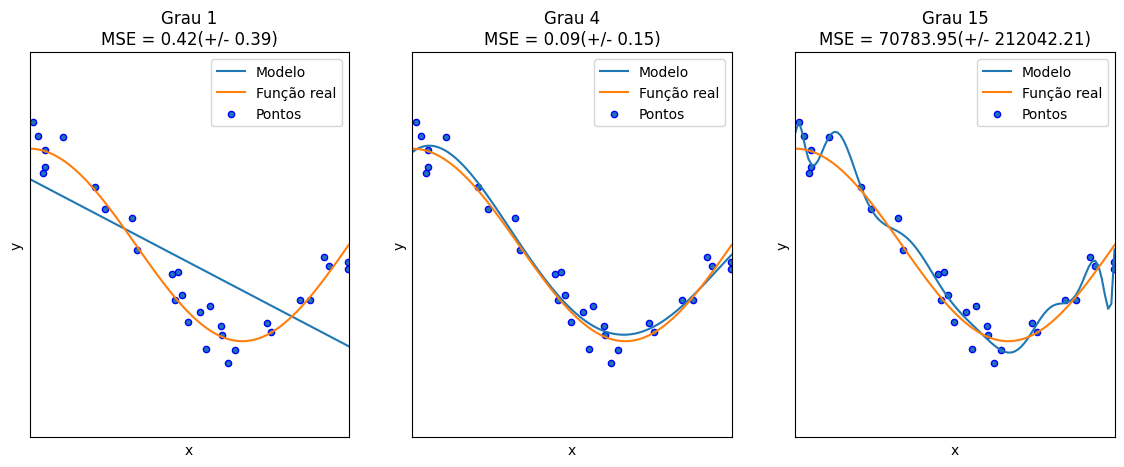

In [ ]:
#@title Geração de dados sintéticos

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


n_samples = 30

degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Avaliar os dados utilizando validação cruzada (crossvalidation)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo")
    plt.plot(X_test, true_fun(X_test), label="Função real")
    plt.scatter(X, y, edgecolor='b', s=20, label="Pontos")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Grau {}\nMSE = {:.2f}(+/- {:.2f})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()



Na primeira imagem, o modelo não captura os pontos (underfitting).

Na segunda imagem, os pontos estão próximos do modelo, que é similar a função real.

Já a terceira image, o modelo basicamente está sobrepondo aos pontos da base de treinamento (função tem 15 graus), isto faz com que fique específica demais para a base de treinamento e não generalize para novos dados (overfitting).

## Viés

Viés refere-se à diferença entre as previsões médias de um modelo e os valores reais que estamos tentando prever. O viés pode ser visto como o erro causado por suposições  simples no modelo de aprendizado, que o impedem de capturar totalmente a estrutura dos dados. Um modelo com alto viés geralmente leva a **underfitting**.

## Variância

Variância refere-se ao quanto as previsões de um modelo variam para diferentes conjuntos de dados de treinamento. Um modelo com alta variância tende a aprender muito bem os dados de treinamento, incluindo o ruído e as peculiaridades dos dados, mas não consegue generalizar bem para novos dados. Isso leva ao **overfitting**, onde o modelo tem um desempenho muito bom nos dados de treinamento, mas um desempenho ruim nos dados de teste.

## Trade-off entre Viés e Variância

O objetivo no aprendizado de máquina é encontrar um equilíbrio ideal entre viés e variância. Um modelo com um bom equilíbrio terá um viés suficientemente baixo para capturar os padrões subjacentes dos dados e uma variância baixa o suficiente para não se ajustar ao ruído ou variações específicas dos dados de treinamento. Esse equilíbrio permite que o modelo generalize bem para novos dados.

Utilizando um exemplo similar ao anterior, uma regressão linear simples, com polinômios de vários graus, é possível verificar o tradeoff entre o viés e a variância.

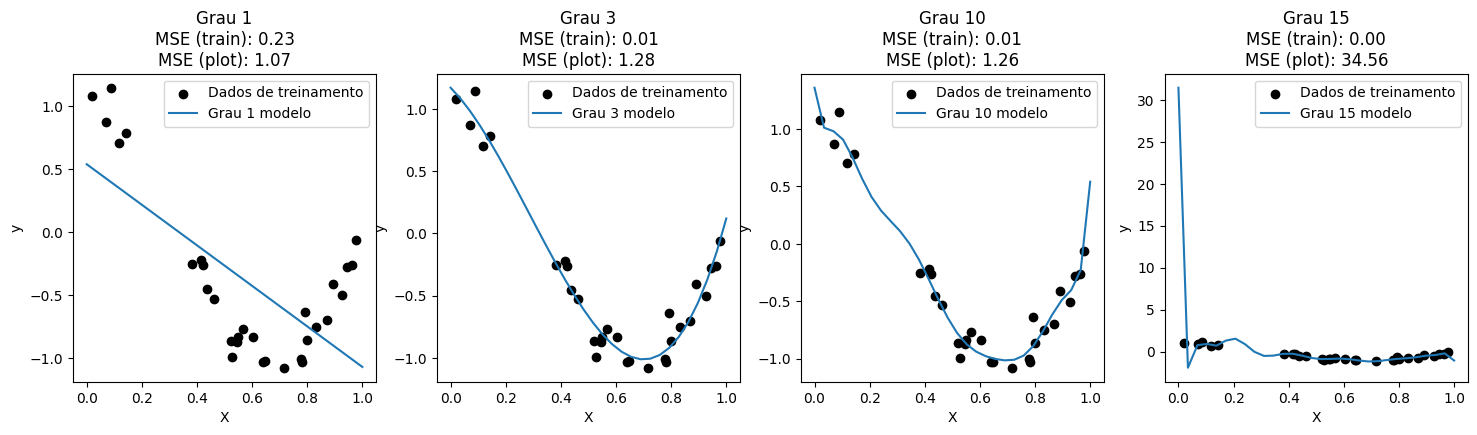

In [ ]:
#@title viés
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Gerar dados sintéticos
np.random.seed(0)

n_samples = 30


X = np.sort(np.random.rand(n_samples), axis=0)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
#X = np.sort(np.random.rand(100, 1) * 10, axis=0)
#y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Dados para plotar os modelos
X_plot = np.linspace(0, 1, 30).reshape(-1, 1)

# Diferentes graus de polinômios para comparar viés e variância
degrees = [1, 3, 10, 15]

plt.figure(figsize=(18, 4))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X[:, np.newaxis], y)

    # Predição para o conjunto de plotagem
    y_plot_pred = model.predict(X_plot)

    # Predições para os dados de treinamento
    y_train_pred = model.predict(X[:, np.newaxis])

    # Calcular MSE no conjunto de treinamento e no conjunto de plotagem
    mse_train = mean_squared_error(y, y_train_pred)
    mse_plot = mean_squared_error(np.sin(X_plot).ravel(), y_plot_pred)

    # Plotar dados de treinamento e modelo
    plt.subplot(1, 4, i + 1)
    plt.scatter(X, y, color='black', label='Dados de treinamento')
    plt.plot(X_plot, y_plot_pred, label=f'Grau {degree} modelo')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Grau {degree}\nMSE (train): {mse_train:.2f}\nMSE (plot): {mse_plot:.2f}')
    plt.legend(loc='best')

#plt.suptitle('Viés e Variância em Modelos de Regressão Polinomial')
plt.show()


* Grau 1 (Modelo Linear): Este modelo simples provavelmente terá alto viés e
baixo erro de variância, não capturando a curvatura dos dados (underfitting).

* Grau 3: Este modelo representa um bom equilíbrio entre viés e variância, capturando bem os padrões dos dados sem ser excessivamente complexo.

* Grau 10: Este modelo começa a apresentar alta variância, ajustando-se excessivamente aos dados de treinamento e possivelmente ao ruído (overfitting).

* Grau 15: Este modelo tem muito alta variância, capturando quase todos os detalhes, incluindo o ruído nos dados de treinamento, resultando em overfitting severo.

## Concluindo

Modelos muito simples  não capturam padrões importantes e geram alto viés, enquanto modelos muito complexos, alta variância, se ajustam ao ruído e não generalizam bem.

O objetivo deve ser sempre encontrar um equilíbrio que minimize o viés e a variância em busca de um modelo que generalize bem.

Lembre-se: Um modelo deve ser feito para funcionar com dados que ele ainda não viu (**generalizar**)!!!

